### (1) Do the datacamp exercises on regression and hypertuning
### (2) Read the 2 articles on tech jobs, and machine learning/econometrics
### (3) Complete the below notebook (WARNING: the results will not look partiuclarly good until the last hypertuning part. You'll notice that you can even get a negative R squared. Read this explanation to learn why: http://www.fairlynerdy.com/what-is-r-squared/)

##### Submit to gradescrope both: 
- PDF print out to HW 5 PDF that includes the graphs and your text answers, on gradescope (15 pts)
- hw5.ipynb to HW 5 for auto grading (15 pts)

In [3]:
# Import Modules
# YOU MUST REMOVE ALL REFERNCES TO MATPLOTLIB BEFORE SUBMISSION 
import os
import numpy as np
import pandas as pd
##import matplotlib.pyplot as plt
##%matplotlib inline  
from sklearn.linear_model import Ridge, LinearRegression, RidgeCV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import math  

In [4]:
# Load the Ladybug data into a dataframe
"""
In 1983 an article was published about ladybird beetles and their 
behavior changes under different temperature conditions (N. H. Copp. Animal Behavior, 31,:424-430). 
An experiment was run to see how many beetles stayed in light as temperature changed.
"""

def get_ladybug_df():
    file_path = os.getenv("ROOT_PATH", "./") + 'LadyBugs.csv'
    return pd.read_csv(file_path)


df = get_ladybug_df()
#df = pd.read_csv("LadyBugs.csv") 
#df.head()

In [87]:
# Warmup. Write a function that shows the first 5 observations (hint use DataFrame method head)
def first_five(df):
    return df.head(50)
first_five(df)

# Linear Regression, Part I  

In [45]:
# Create data frames for features (Lighted) and target variable (Temp)
y = df[['Lighted']]
X = df[['Temp']]

# Train the model using the training sets
def train_OLS(X, y):
    """
    :param train_OLS: X, y dataframes
    :return: ols, X_test, y_test
    """ 
    # Create training and test sets with 0.3 test size AND A RANDOM_STATE = 12345 (Read the docs for train_test_split() )
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12345)

    # Create linear regression object call ols
    ols = LinearRegression()
    
    # Fit the model 
    ols.fit(X_train, y_train)
    
    #Return the ols model, and the X_test and y_test data
    return ols, X_test, y_test
    #return ols, X_train, y_train

ols, X_test, y_test = train_OLS(X, y)
ols.coef_

#ols, X_train, y_train = train_OLS(X, y)
#ols.coef_


array([[0.47768274]])

## Plot outputs

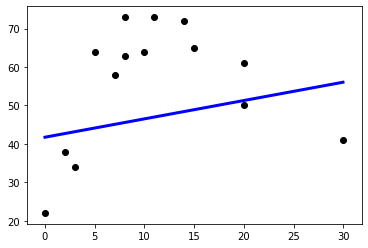

In [7]:
x_min = int(X_test.min())
x_max = int(X_test.max())

# Scatter plot the actual test data against the fitted "line"
predictor_space = pd.DataFrame(np.arange(x_min, x_max, 0.05))
##plt.plot(predictor_space, ols.predict(predictor_space), color='blue', linewidth=3)
##plt.scatter(X_test, y_test,  color='black')

In [37]:
# Get the predicted y_pred using the test data
y_pred = ols.predict(X_test)

# Compute and print the R^2 and MSE 
print("R^2: {}".format(ols.score(X_test, y_test)))
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {}".format(mse))

#R^2: -0.26628594368008884
#Mean Squared Error: 302.4097574070286

R^2: -0.26628594368008884
Mean Squared Error: 302.4097574070286


## Predict on the Test data

In [34]:
# Get the predicted y_pred using the test data
#y_pred = ols.predict(X_train)

# Compute and print the R^2 and MSE 
#print("R^2: {}".format(ols.score(X_train, y_train)))
#mse = mean_squared_error(y_train, y_pred)
print("Mean Squared Error: {}".format(mse))

#(0.27811893340211236+0.26628594368008884)/-0.26628594368008884

R^2: 0.27811893340211236
Mean Squared Error: 84.62772161741836


-2.0444371548812934

(3 points)
## a. Does this plot look like a good fit to the data? (Discuss bias versus variance and out-of-sample (OOS) prediction in your answer)
No, clearly the data is non-linear. A polynomial would be a better fit. Yes, our model has low variance, but the bias is very high as a result. Clearly, our model needs to be a bit more complicated. Our model really struggles with predicting on unseen data. Our out of sample metrics suggest out model needs to be adjusted to better perform on unseen data. While this may mean adding variance to our model, it will help with bias.

## b. What do out of sample metrics tell you?
The negative R^2 tells us that our regression line is worse than just using the mean value, i.e, that's how bad our model is. It is difficult to gauge the sample metrics, namely MSE in isolation. So, I computed the sample metrics on the training data as well. The R^2 was .28 and the MSE was 84. So, our model performed significantly better on the training data. The R^2 droped by over 200% when our model was fitted on unseen data! A large increase is the MSE may indicate we are overfitting the model to our training data. This would indicate that we are overfitting if the R^2's were similar. But since the R^2's are very different this may instead indicate we are "underfitting". Clearly, our model is not robust.

# Polynomial Regression, Part II

In [42]:
df = get_ladybug_df()
#df = pd.read_csv("LadyBugs.csv") 
# Create arrays for features (Lighted) and target variable (Temp)
yp = df[['Lighted']]
Xp = df[['Temp']]

# Add in 15-degree polynomial of the X variables
poly = PolynomialFeatures(degree=15)
Xp = pd.DataFrame(poly.fit_transform(Xp))
print("Dimensions of X after reshaping: {}".format(Xp.shape))

def train_Poly(X, y):
    """
    Model your code off of the earlier modeling
    :param train_Poly: X, y dataframes
    :return: ols, X_test, y_test
    """ 
    
   # Create training and test sets with 0.3 test size and random_state = 12345, (replace None)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12345)


    # Create linear regression object, (replace None)
    ols2 = LinearRegression()
      
    # Fit the model using the training sets 
    ols2.fit(X_train, y_train)
    
    return ols2, X_test, y_test

ols2, X_test2, y_test2 = train_Poly(Xp, yp)
ols2.coef_

Dimensions of X after reshaping: (44, 16)


array([[ 0.00000000e+00,  2.48921020e-10,  2.79794504e-12,
         4.92269561e-13,  5.40022249e-12,  5.44612622e-11,
         4.92304431e-10,  3.77661130e-09,  2.20495799e-08,
         7.35269557e-08, -1.66215797e-08,  1.51776135e-09,
        -7.30216623e-11,  1.95917325e-12, -2.78257982e-14,
         1.63534754e-16]])

## Plot outputs

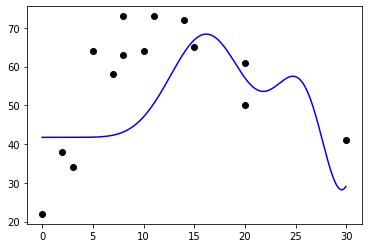

In [21]:
predictor_space = pd.DataFrame(np.arange(x_min, x_max, 0.05)) # Creates prediction space on x interval
predictor_poly = pd.DataFrame(poly.fit_transform(predictor_space)) # Creates data to predict on

# Scatter plot the actual test data with the fitted "line"
##plt.scatter(X_test2.iloc[ : ,[1]], y_test2,  color='black')
##plt.plot(predictor_space, ols2.predict(predictor_poly), color='blue') # Plot fitted model 

## Predict on the Test data

In [22]:
def score_model(ols2, X, y):
    """
    Model your code based off of earlier prediction cells but now returning the values in this function
    :param ols: LinearRegression Model 
    :return: (r_squared, mse)
    """

    # Predict on the test data: y_pred
    y_pred = ols2.predict(X)
    
    # Calculate R^2 value
    # (replace None)
    r_squared = r2_score(y, y_pred)

    # Compute MSE
    # (replace None)
    mse = mean_squared_error(y, y_pred)
    #rmse = math.sqrt(mse)
    
    return r_squared, mse

r_squared, mse = score_model(ols2, X_test2, y_test2)
print("R^2: {}".format(r_squared))
print("Mean Squared Error: {}".format(mse))

R^2: -0.06626668664938995
Mean Squared Error: 254.6418932075747


(3 points)
## a. What exactly is the plot code doing above. 
In your own words, explain what " ols2.predict(predictor_poly) " does, and then " plt.plot(predictor_space, ols2.predict(predictor_poly), color='blue') ". (An answer like " it plots the fitted model " is not sufficient. Tell what the two series that are being plotted are. 
We have a model, i.e coeficients, but in order to graph the model it needs to take in data, actual values. So, "predictor_poly" passes in values which in turn our model (ols2) uses to predict on. This lets us plot a smooth function. 
In the plt.plot line of code we first pass predictor_space which defines the x-axis. Changing any component of "predictor_space" would change the layout of the graph and hence the appearance of our model. Then "ols2.predict(predictor_poly)" is passed in. This is the f(x) or y values from our model - the predictions. 
The " color = 'blue' " makes the color of the plot blue.


## a. Does this plot look better than the previous OLS plot? (Discuss what the added polynormial terms do to the model fit with respect to bias versus variance.)
Well, while there is less bias, the variance is now very high. In other words, our model has too many terms. It is likely that we are overfitting. The added polynomial terms allow the model to better fit the data. But this added flexibility can also make the model over respond to specifics in the data and hence be less robust.

## b. Why? What do out of sample metrics tell you?
While the R^2 is still negative, but it is better than the R^2 from ols. The MSE is also smaller than the MSE from OLS. This indicates that our polynomial is probably an improvement from ols.

# Ridge Regression, Part III

In [29]:
# Read the CSV file into a DataFrame: df
df = get_ladybug_df()
#df = pd.read_csv("LadyBugs.csv") 

# Create arrays for features (Lighted) and target variable (Temp)
# your code here
yr = df[['Lighted']]
Xr = df[['Temp']]

# Add in 15-degree polynomial of the X variables
Xr = pd.DataFrame(PolynomialFeatures(degree=15).fit_transform(Xr))
    
def train_Ridge(X, y):
    """
    Model your code off of the earlier modeling
    :param train_Poly: X, y dataframes
    :return: ols, X_test, y_test
    """ 
    
   # Create training and test sets with 0.3 test size and random_state = 12345, (replace None)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12345)

    # Create a ridge regressor object called ridge with lambda = 0.1
    ridge = Ridge(normalize = True, alpha = 0.1)
    
    # Train the ridge model using the training sets (the polynomial factors are in the data)
    ridge.fit(X_train, y_train)
    
    return ridge, X_test, y_test

ridge, X_test3, y_test3 = train_Ridge(Xr, yr)
ridge.coef_

array([[ 0.00000000e+00,  8.88340600e-01,  1.74389597e-03,
        -1.53916084e-04, -6.00846537e-06, -1.67396163e-07,
        -4.07149121e-09, -8.93087479e-11, -1.71415060e-12,
        -2.47687064e-14, -2.88044737e-17,  1.79307427e-17,
         1.02580139e-18,  4.32810664e-20,  1.61486326e-21,
         5.63326556e-23]])

## Plot outputs

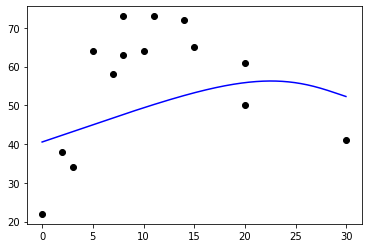

In [82]:
predictor_space = pd.DataFrame(np.arange(x_min, x_max,  0.056)) # Creates prediction space on x interval
predictor_poly = pd.DataFrame(poly.fit_transform(predictor_space)) # Creates data to predict on


# Scatter plot the actual test data with the fitted "line"
##plt.scatter(X_test3.iloc[ : ,[1]], y_test3,  color='black')
##plt.plot(predictor_space, ridge.predict(predictor_poly), color='blue') # Plot fitted model 

## Predict on the Test data

In [76]:
# Compute and print R^2 and MSE from ridge using the score_model() function 
r_squared, mse = score_model(ridge, X_test2, y_test2)
print("R^2: {}".format(r_squared))
print("Mean Squared Error: {}".format(mse))

R^2: 0.028120493496477383
Mean Squared Error: 232.10069357355556


-1658.98422

(3 points)
## a. Does this plot look better than the previous Polynomial plot? (Discuss what regularization does with respect to the added polynormial terms, and how that affects the plot with respect to bias versus variance.)
Yes the plot looks only slightly better than the polynomial plot. Regularization or more specifically ridge regression penalizes or downweights the coeficients that are less important in explaining 'lighted' or redundant. The plot now does a better job of not fitting into the noise. This means our plot will have a lot less variance but potentially less bias. In our plot, we clearly have less variance, and it doesn't seem that bias has increased. 
 
## b. Why? What do out of sample metrics tell you? Use the score_model method you wrote.
The out of sample metrics tell us our model is doing a better job of explaining 'lighted'. Our R^2 is finally positive and the MSE is the lowest yet. Clearly, this is our best model yet.

# Get the 10 fold CV Scores (R2) for all 3 fitted models

In [74]:
ols_scores = cross_val_score(ols, X, y, cv = 10, scoring = 'r2')
print("Cross-validated OLS scores:", ols_scores)
#print("Cross-validated OLS scores:", ols_scores.mean()*-1)

# ols2
poly_scores = cross_val_score(ols2, Xp, yp, cv = 10, scoring = 'r2')
print("Cross-validated Polynomial Regression scores:", poly_scores)
#print("Cross-validated Polynomial Regression scores:", poly_scores.mean()*-1)

# ridge
ridge_scores = cross_val_score(ridge, Xr, yr, cv = 10, scoring = 'r2')
print("Cross-validated Ridge scores:", ridge_scores)
#print("Cross-validated Ridge scores:", ridge_scores.mean()*-1)

Cross-validated OLS scores: [-33.96581976 -29.71743708  -0.83579887  -1.94477718  -9.68817203
  -9.26327739  -5.81365592  -0.09299868  -2.28013562 -12.21403216]
Cross-validated OLS scores: 10.581610468478257
Cross-validated Polynomial Regression scores: [-3.05697054e+01 -2.47312079e+01 -1.52022791e-01 -3.34808856e+00
 -1.26587709e+01 -5.15858469e+00 -5.21440502e+00 -4.22700543e+00
 -1.65898422e+03 -3.38282176e+06]
Cross-validated Polynomial Regression scores: 338456.6808812808
Cross-validated Ridge scores: [-23.94554338 -25.10535509  -0.2987926   -1.6796061   -6.84936727
  -5.11062478  -2.04986497  -1.14604777  -0.48135013 -45.70781976]
Cross-validated Ridge scores: 11.237437184753405


## Are any of these models performing well? 
The R^2's are all very low. Thus, no model is performing well but ridge is definitely the best.

# Hyper Tune Lambda, K-fold Grid Search, Ridge Regression, Part IV

In [78]:
# Read the CSV file into a DataFrame: df
df = get_ladybug_df()
#df = pd.read_csv("LadyBugs.csv") 

# Create arrays for features (Lighted) and target variable (Temp)
y = df[['Lighted']]
X = df[['Temp']]

# Add in 15-degree polynomial of the X variables
X = pd.DataFrame(PolynomialFeatures(degree=15).fit_transform(X))

# Create training and test sets with 0.3 hold out for test data and random_state = 12345
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size = 0.3, random_state = 12345)

# Setup a grid of lambdas (aka alphas) called param_grid of 1000 lambdas from .001 to 10
param_grid = {'alpha': np.linspace(0.001, 10, num = 1000)}

# Create a ridge regressor object called ridge2
ridge2 = Ridge(normalize = True) 

# Setup the GridSearchCV object called grid_ridge for 10 folds using the param_grid above and ridge object
grid_ridge = GridSearchCV(ridge2, param_grid, cv = 10)

# Train the model using the training sets 5 folds for all lambdas!
# your code here
grid_ridge.fit(X_train4, y_train4)

#Get the best lambda
best = grid_ridge.best_params_


# Create a final ridge regressor object called ridge_final using the best lambda from hypertuning
ridge_final = Ridge(alpha = best['alpha'], normalize = True)

# Now fit this model on the training data 
ridge_final.fit(X_train4, y_train4)

Ridge(alpha=0.011009009009009009, copy_X=True, fit_intercept=True,
      max_iter=None, normalize=True, random_state=None, solver='auto',
      tol=0.001)

## Plot outputs

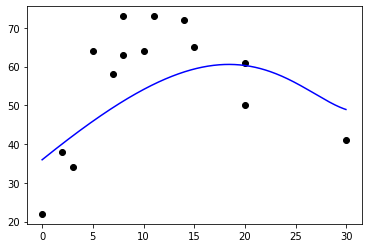

In [84]:
predictor_space = pd.DataFrame(np.arange(x_min, x_max, 0.056)) # Creates prediction space on x interval
predictor_poly = pd.DataFrame(poly.fit_transform(predictor_space)) # Creates data to predict on

# Scatter plot the actual test data with the fitted "line"
##plt.scatter(X_test4.iloc[ : ,[1]], y_test4,  color='black')
##plt.plot(predictor_space, ridge_final.predict(predictor_poly), color='blue') # Plot fitted model 

## Final scores given tuned lambda

In [85]:
# Check performance using score_model
r_squared, mse = score_model(ridge_final, X_test4, y_test4)
print("R^2: {}".format(r_squared))
print("Mean Squared Error: {}".format(mse))

R^2: 0.380421542622177
Mean Squared Error: 147.9654511884752


(6 points)
## a. How many times did you estimate the model above?
Number of lambdas * Number of K-folds = 1000 * 10 = 10,000
## b. How does your final score (R2 and MSE) compare to before?
The R^2 is better than before by nearly 36 percentage points. The MSE is also lower than the previous MSE.
## c. What about your fit to the data graphically? 
Graphically, the plot is much improved. The plot captures the general trend in the data without overfitting.
## d. Why do you think the fit is better or worse using Ridge and hypertuning your lambda paramater?
The fit is better using ridge because we are no longer fitting into the noise. The model is improved further from hypertuning because our initial guess of lambda, was not necessarily the best guess. Cross validation allows us to find the a better lambda.
## e. Explain the costs and benefits of increasing the parameter grid in hypertuning your model. 
The benefits are a better lambda - one that best tells us what covariates to keep/toss/down weight so that our model is not overfitting. The costs are computational.
## f. Explain the costs and benefits of increasing the number of folds in hypertuning your model. Discuss the the extreme case, leave-one-out cross validation (LOOV-CV). 
If there were no costs with increasing the number of folds in hypertuning our model we would always do LOOV-CV. But we would be testing our model on a single data point. Furthermore, if we have too many folds our test set won't capture the variation in the data. Too many folds is also computationally expensive. Too little folds means that we will have a lot of bias since less training data is used for fitting our model.